In [2]:
from honhaarpannel.models import Student

In [3]:
import os
import django
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [4]:
Student.objects.all()

<QuerySet [<Student: arvind>, <Student: Aniket Singh>, <Student: trishal>]>

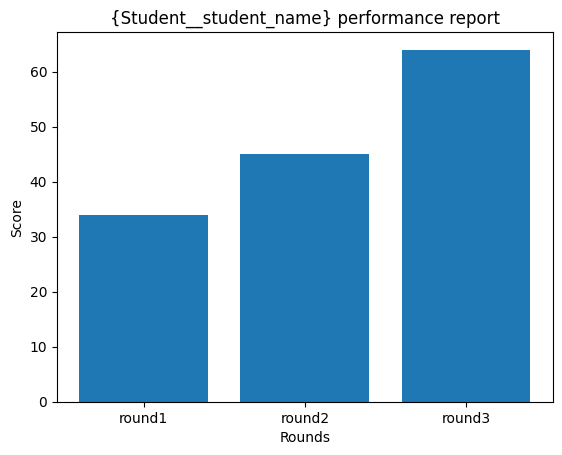

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# here this is the demo how i can make every student analysis reports of all schools 
# i want studnets performance report in the form of bar chart where have three rounds like round1, roun2, round3
# i want student performance shown by three diffrent bars in barchart which showing every three rounds score in bar chart 

# this is the simeple example how i want to make its just a simple example please make bar chart in the format

# like in a particular school lets school_id =1 have student name aniket singh so now we go to make barchart for aniket singh what is performance of this particular student in diffrent rounds of match
# so we first get score of students in match of three rounds of and store score in score variable now score

score =[34,45,64]
# now in score have data of the three rounds like round1=34, round2=45 and round3=64

# and take one more variable like name rounds which contain three diffrent rounds name
rounds=['round1', 'round2', 'round3']
plt.bar(rounds,score)
plt.xlabel("Rounds")
plt.ylabel("Score")
plt.title("{Student__student_name} performance report")
plt.show()
# above code is an exmple like how i want data of the every students
# here its just an example but you need to first fetch the data of every students performance of every rounds from the database please make query from the database and make student performance report of every student of evary schools like here have diffrent schools and diffrent students
# please use my database and its models for fetching the data 
# here u use StudentQuestion model for fetching data like in student table have student as a foregin ky and question for forgein key which helps to feting rou
# if have student which participate in a single round but not in second or third you cansider as a zero 
# here please keep in mind you need to use StudentQuestion models for quesring and fetching data like schools rounds students
# i am also give you a my model please see how models are desingned

No data available for Sardar balabhbhai patel school


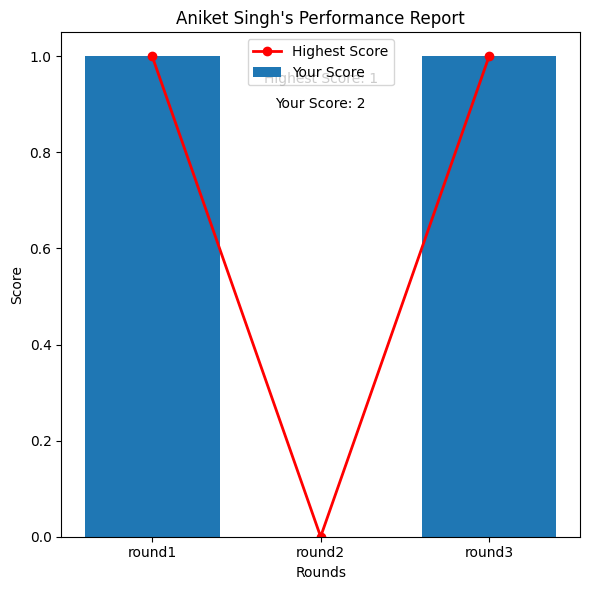

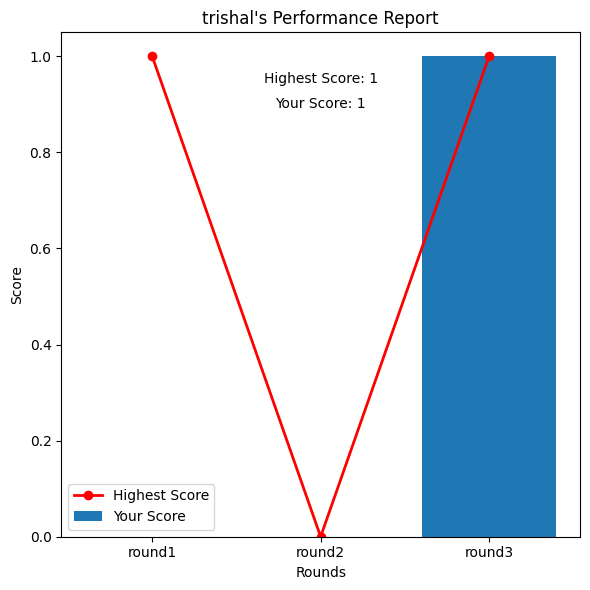

In [6]:
import numpy as np
from django.db.models import Count, Case, When, Value
from django.db.models import Sum
from honhaarpannel.models import School, Batch, Student, Match, Round, StudentQuestion
from django.db.models import Case, When, IntegerField

schools = School.objects.all()

for school in schools:
    students = Student.objects.filter(batch__school=school)
    rounds = Round.objects.filter(match__school=school)

    round_names = [round_obj.round_name for round_obj in rounds]
    highest_scores = [0] * len(round_names)

    if rounds.exists() and students.exists():
        for student in students:
            student_scores = []
            for round_obj in rounds:
                score = StudentQuestion.objects.filter(
                    question__round=round_obj,
                    student=student
                ).aggregate(score=Sum(
                    Case(When(correct=True, then=Value(1)),
                         default=Value(0),
                         output_field=IntegerField()
                    )
                ))['score']
                student_scores.append(score)

            overall_score = sum(student_scores)

            highest_scores = [max(highest, student) for highest, student in zip(highest_scores, student_scores)]

            fig, ax = plt.subplots(figsize=(6, 6))
            ax.bar(round_names, student_scores, label="Your Score")
            ax.plot(round_names, highest_scores, color='red', marker='o', linestyle='-', linewidth=2, label="Highest Score")
            
            # display score
            ax.text(0.5, 0.9, f"Highest Score: {max(highest_scores)}", transform=ax.transAxes, ha='center')
            ax.text(0.5, 0.85, f"Your Score: {overall_score}", transform=ax.transAxes, ha='center')

            ax.set_xlabel("Rounds")
            ax.set_ylabel("Score")
            ax.set_title(f"{student.student_name}'s Performance Report")
            ax.legend()

            plt.tight_layout()

        plt.show()
    else:
        print(f"No data available for {school.school_name}")